<img src="https://www.ucenfotec.ai/images/logo.png" />

In [47]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def print_img(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap= "gray")
    plt.show()

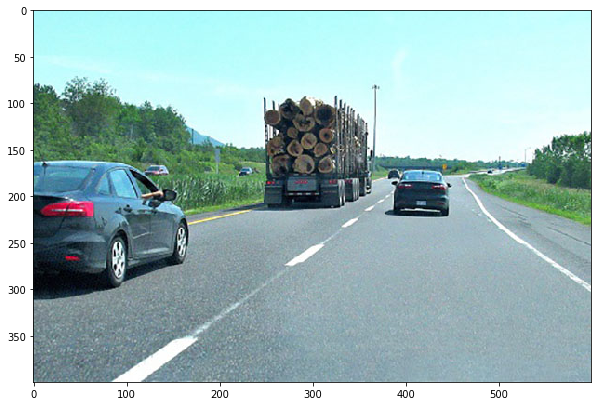

In [49]:
# se imprime la imagen original

frame = cv2.imread('carril.jpg')
frame_bn = frame[:,:,0]

# imprimir
print_img(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

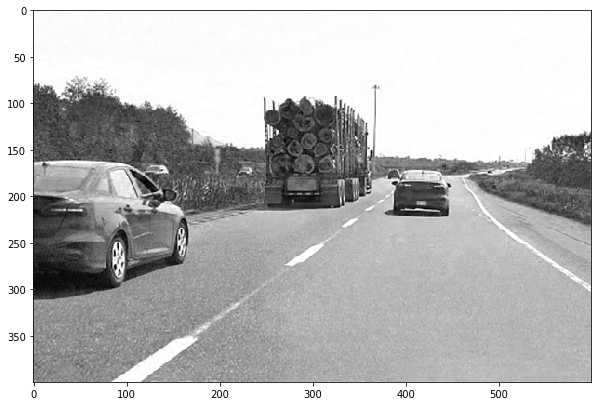

In [50]:
# se imprime la imagen en blanco y negro
# esto es solo para comprender la diferencia de colores.

# imprimir
print_img(cv2.cvtColor(frame_bn, cv2.COLOR_BGR2RGB))

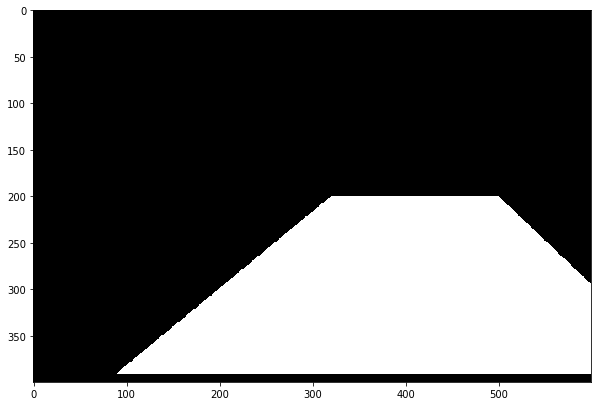

In [51]:
# Mascara: aqui se crea un poligono que se utiliza para enfocar el area de interes.
# el poligono es un trapecio que se alinea con el area de vision del conductor y el 
# carril que tiene de frente.

# se crea un arreglo de ceros basado en la imagen en blanco y negro
stencil = np.zeros_like(frame_bn)

# se define el poligono de interes.
polygon = np.array([[90,390], [320,200], [500,200], [700,390]])

# se llena la imagen de ceros con el poligono creado en blanco (unos)
cv2.fillConvexPoly(stencil, polygon, 1)

# imprimir
print_img(stencil)

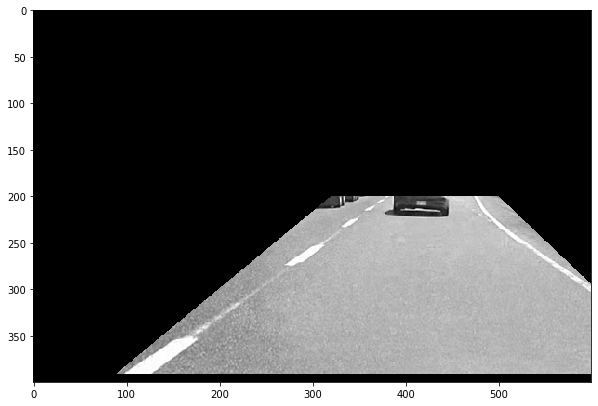

In [52]:
# se aplica la mascara a la imagen en blanco y negro
img = cv2.bitwise_and(frame_bn, frame_bn, mask=stencil)

# imprimir
print_img(img)

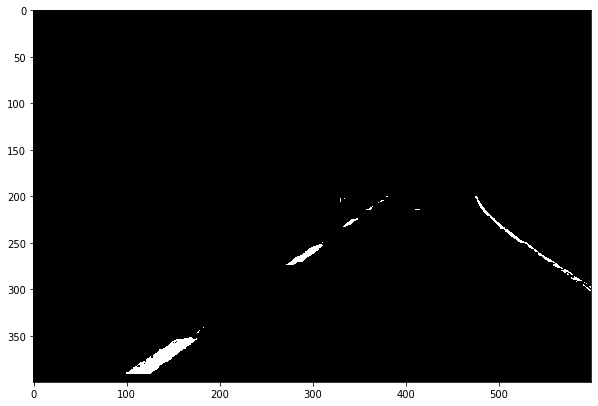

In [53]:
# Se usa cv2.threshold para convertir la imagen anterior en blanco y negro puro
# esto causa que las lineas blancas sean las unicas que queden en blanco.
ret, thresh = cv2.threshold(img, 240, 300, cv2.THRESH_BINARY)

# imprimir
print_img(thresh)

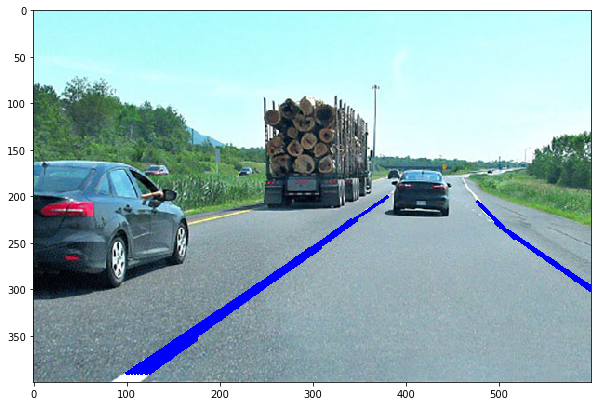

In [54]:
# cv2.HoughLinesP nos permite encontrar lineas en una imagen. En este caso estas son
# las de las divisiones de los carriles.
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# se dibujan las lineas en la imagen original (frame) con color azul
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

# imprimir
print_img(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))